# Tarea 2

Integrantes:
- Romina Loayza
- Nicolás Gutierrez
- Alfredo Aro

In [7]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm # Import Statsmodels for statistical modeling
from sklearn.linear_model import LinearRegression # Import LinearRegression from scikit-learn for regression analysis
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for model evaluation
from statsmodels.stats.diagnostic import het_breuschpagan, het_white # Import tests for heteroscedasticity
from scipy import stats
from tabulate import tabulate

## 1. Limpieza de la data

### Módulo Empleo

In [5]:
csv_path = os.path.join("data", "ENPOVE2022_V_600 Empleo.csv")
m_empleo= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_empleo.columns= m_empleo.columns.str.lower()
m_empleo

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,gedad1,gedad2,p625_d,p625_p,m622_1,m622_2,ingtot,ingtot_monetario,ingtot_no_monetario,factorfinal
0,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,2,2,1,1,1600,300,1900,1600,300,13.175820
1,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,0,0,,,,,,,,13.175820
2,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1206802,9340,3,...,3,3,1,1,,,1200,1200,0,13.175820
3,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,2,2,1,1,800,300,1100,800,300,26.351641
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,1207001,9345,6,...,0,0,,,,,,,,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11616,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,2,2,1,1,,,1300,1300,0,18.422158
11617,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,393,12,...,1,1,1,1,,,1299,1299,0,18.422158
11618,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,3,1,1,,,312,312,0,12.281439
11619,24,TUMBES,1,TUMBES,1,TUMBES,Tumbes,44789,396,13,...,3,4,,,,,,,,12.281439


### Módulo Residentes del Hogar

In [11]:
csv_path = os.path.join("data", "ENPOVE2022_V_200_Residentes.csv")
m_residentes= pd.read_csv(csv_path,encoding = "latin-1", low_memory=False)
m_residentes.columns= m_residentes.columns.str.lower()
m_residentes

,ï»¿ccdd,departamento,ccpp,provincia,ccdi,distrito,ciudad,conglomerado,nselv,vivienda,...,p211_n,p211_1,p200_aportante,p211_n_parentesco,p211_n_sexo,p211_n_aãos,p211_n_meses,p211_n_ecivil,p211_n_migrante,factorfinal
0,15,LIMA,1,LIMA,19,LURIN,Lima,29806,68378,12,...,2,4.Otro,,2,2,29,,1,1,133.030686
1,15,LIMA,1,LIMA,19,LURIN,Lima,29778,68073,9,...,1,4.Otro,,1,2,35,,1,1,133.030686
2,7,LIMA,1,CALLAO,1,CALLAO,Lima,1814802,16137,9,...,1,4.Otro,,1,2,35,,6,1,133.030686
3,14,LAMBAYEQUE,1,CHICLAYO,6,LA VICTORIA,Chiclayo,3976,4564,9,...,1,4.Otro,,1,2,17,,6,1,18.043333
4,2,ANCASH,18,SANTA,1,CHIMBOTE,Chimbote,12284,10250,9,...,5,4.Otro,,11,2,17,,1,1,26.351641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43374,14722,29,...,,,,,,,,,,66.313829
12483,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12484,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43377,14725,32,...,,,,,,,,,,132.627658
12485,4,AREQUIPA,1,AREQUIPA,7,JACOBO HUNTER,Arequipa,43410,14694,7,...,,,,,,,,,,132.627658


### Merge

In [20]:
columnas_comunes = ['ï»¿ccdd', 'ccpp', 'ccdi', 'conglomerado', 'nselv', 'vivienda', 'thogar', 'nhogar', 'p200_n']
#estas son las columnas comunes entra las dos bases de datos que nos ayudarán a realizar el merge

In [22]:
print("Contenido de las columnas comunes en m_residentes:")
print(m_residentes[columnas_comunes].head())

print("\nContenido de las columnas comunes en m_empleo:")
print(m_empleo[columnas_comunes].head())

Contenido de las columnas comunes en m_residentes:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0       15     1    19         29806  68378        12       1       1       5
1       15     1    19         29778  68073         9       1       1       6
2        7     1     1       1814802  16137         9       1       1       5
3       14     1     6          3976   4564         9       1       1       1
4        2    18     1         12284  10250         9       1       1       5

Contenido de las columnas comunes en m_empleo:
   ï»¿ccdd  ccpp  ccdi  conglomerado  nselv  vivienda  thogar  nhogar  p200_n
0        2    18     1       1206802   9340         3       1       1       1
1        2    18     1       1206802   9340         3       1       1       4
2        2    18     1       1206802   9340         3       1       1       5
3        2    18     1       1207001   9345         6       1       1       1
4        2    18     1       1207001   9345

### Creación de código único

In [60]:
m_residentes['codigo_unico'] = m_residentes[columnas_comunes].astype(str).agg('-'.join, axis=1)
m_empleo['codigo_unico'] = m_empleo[columnas_comunes].astype(str).agg('-'.join, axis=1)

In [62]:
for columna in columnas_comunes:
    m_residentes[columna] = m_residentes[columna].astype(str).str.strip()  
    m_empleo[columna] = m_empleo[columna].astype(str).str.strip() 

In [64]:
coincidencias = m_residentes['codigo_unico'].isin(m_empleo['codigo_unico'])
coincidencias

0        True
1        True
2        True
3        True
4        True
         ... 
12482    True
12483    True
12484    True
12485    True
12486    True
Name: codigo_unico, Length: 12487, dtype: bool

In [66]:
venezolanos = pd.merge(m_residentes, m_empleo, on='codigo_unico', how='inner', suffixes=('_residente', '_empleo'))

In [68]:
columnas_residente = set(venezolanos.filter(regex='_residente').columns)
columnas_empleo = set(venezolanos.filter(regex='_empleo').columns)

In [70]:
for col_residente in columnas_residente:
    # Identificar el nombre base de la columna
    col_base = col_residente.replace('_residente', '')
    col_empleo = col_base + '_empleo'
    
    if col_empleo in columnas_empleo:
        # Priorizar la columna de m_empleo
        venezolanos[col_base] = venezolanos[col_empleo]
        # Eliminar las columnas duplicadas
        venezolanos.drop([col_residente, col_empleo], axis=1, inplace=True)

### **Selección de variables**
- p203: ¿Cuál es la relación de parentesco con el/la jefa del hogar? **[Categórica]**
- p204: Sexo **[Categórica]**
- p205_a: ¿Qué edad tiene en años cumplidos? **[Numérica]**
- p208: ¿Migró de Venezuela? **[Categórica]** - esta variable es más que todo para asegurar que todos hayan dicho que 'sí'
- p613: Usted, ¿ha firmado algún contrato laboral o brindó algún comprobante de pago por sus servicios? **[Categórica]**
- p616a: Normalmente, ¿Cuántas horas trabaja a la semana en todas sus ocupaciones? **[Numérica]**
- p621: En su ocupación principal, ¿la frecuencia con que a usted le pagan es...? **[Categórica]**
- p622_1: ¿Cuánto fue su ingreso total sin descuento en el/la anterior, incluyendo horas extra? **[Numérica]**
- estrato: Estrato social **[Categórica]**
- p636: En Venezuela, ¿tenía usted trabajo antes de iniciar su viaje? **[Categórica]**

In [75]:
variables =['p203','p204', 'p205_a', 'p208', 'p613', 'p621', 'p622_1', 'p636', 'estrato', 'p616a']
venezolanos = venezolanos[variables].copy()
venezolanos.head()

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
0,8.Otro pariente,2.Mujer,16,1.SÃ­,,,,2,4,
1,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,,2,4,
2,4.Yerno/nuera,2.Mujer,17,1.SÃ­,,,,2,3,
3,1.Jefe/a del hogar,2.Mujer,17,1.SÃ­,2,1,30,2,4,
4,11.Otro no pariente,2.Mujer,17,1.SÃ­,,,,2,4,


In [77]:
import warnings
warnings.filterwarnings('ignore')
venezolanos = venezolanos.applymap(lambda x: ''.join(filter(str.isdigit, str(x))))
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
0,8,2,16,1,,,,2,4,
1,4,2,17,1,,,,2,4,
2,4,2,17,1,,,,2,3,
3,1,2,17,1,2,1,30,2,4,
4,11,2,17,1,,,,2,4,
...,...,...,...,...,...,...,...,...,...,...
11616,2,2,31,1,2,4,830,2,3,
11617,1,1,30,1,1,2,800,1,4,
11618,2,2,25,1,1,2,300,2,4,
11619,1,1,48,1,2,4,270,1,2,


### Revisamos el tipo de datos

In [84]:
venezolanos.dtypes

p203       object
p204       object
p205_a     object
p208       object
p613       object
p621       object
p622_1     object
p636       object
estrato    object
p616a      object
dtype: object

In [86]:
venezolanos = venezolanos.apply(pd.to_numeric, errors="coerce") 
venezolanos.dropna(inplace=True) 
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0
...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0


### Creamos una nueva variable con el monto mensual de ingresos

In [92]:
# Diccionario con los multiplicadores de frecuencia
multiplicadores = {
    1: 30,  # Diario
    2: 4,   # Semanal
    3: 2,   # Quincenal
    4: 1    # Mensual
}

# Calcular el ingreso mensual usando el diccionario
venezolanos['ingreso_mensual'] = venezolanos['p622_1'] * venezolanos['p621'].map(multiplicadores)
# Creamos una nueva columna para el logaritmo del ingreso mensual
venezolanos['log_ingreso_mensual'] = venezolanos['ingreso_mensual'].apply(lambda x: np.log(x) if x > 0 else np.nan)

# Calcular las horas de trabajo mensual
venezolanos['horas_mensual'] = venezolanos['p616a'] *4
venezolanos

,p203,p204,p205_a,p208,p613,p621,p622_1,p636,estrato,p616a,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0,600.0,6.396930,32.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0,2400.0,7.783224,200.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0,1400.0,7.244228,264.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0,1000.0,6.907755,288.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0,1800.0,7.495542,192.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0,1320.0,7.185387,264.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0,1300.0,7.170120,184.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0,720.0,6.579251,264.0


### Renombramos

In [98]:
venezolanos.rename(columns={
    'p203': 'jefe_hogar',
    'p204': 'sexo',
    'p205_a': 'edad',
    'p208': 'migracion_venezuela',
    'p613': 'firma_contrato',
    'p636': 'trabajo_venezuela',
}, inplace=True)
venezolanos

,jefe_hogar,sexo,edad,migracion_venezuela,firma_contrato,p621,p622_1,trabajo_venezuela,estrato,p616a,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,2.0,1.0,20.0,1.0,3,8.0,600.0,6.396930,32.0
45,1,1,52.0,1,2.0,1.0,80.0,1.0,2,50.0,2400.0,7.783224,200.0
65,1,2,36.0,1,2.0,2.0,350.0,1.0,3,66.0,1400.0,7.244228,264.0
82,1,1,48.0,1,2.0,4.0,1000.0,1.0,4,72.0,1000.0,6.907755,288.0
111,11,1,26.0,1,2.0,2.0,280.0,1.0,3,48.0,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,2.0,4.0,1800.0,1.0,4,48.0,1800.0,7.495542,192.0
11531,8,1,26.0,1,2.0,2.0,330.0,1.0,4,66.0,1320.0,7.185387,264.0
11545,1,1,38.0,1,2.0,3.0,650.0,1.0,2,46.0,1300.0,7.170120,184.0
11567,1,2,46.0,1,2.0,2.0,180.0,1.0,3,66.0,720.0,6.579251,264.0


### Nos quedamos con las variables que necesitamos

In [101]:
venezolanos = venezolanos[['jefe_hogar', 'sexo', 'edad', 'migracion_venezuela', 'trabajo_venezuela', 'estrato', 'ingreso_mensual', 'log_ingreso_mensual', 'horas_mensual']]

In [105]:
venezolanos

,jefe_hogar,sexo,edad,migracion_venezuela,trabajo_venezuela,estrato,ingreso_mensual,log_ingreso_mensual,horas_mensual
14,4,2,17.0,1,1.0,3,600.0,6.396930,32.0
45,1,1,52.0,1,1.0,2,2400.0,7.783224,200.0
65,1,2,36.0,1,1.0,3,1400.0,7.244228,264.0
82,1,1,48.0,1,1.0,4,1000.0,6.907755,288.0
111,11,1,26.0,1,1.0,3,1120.0,7.021084,192.0
...,...,...,...,...,...,...,...,...,...
11530,3,2,23.0,1,1.0,4,1800.0,7.495542,192.0
11531,8,1,26.0,1,1.0,4,1320.0,7.185387,264.0
11545,1,1,38.0,1,1.0,2,1300.0,7.170120,184.0
11567,1,2,46.0,1,1.0,3,720.0,6.579251,264.0


### Descargamos nuestra data

In [108]:
venezolanos.to_csv("venezolanos.csv", index=False)

## 2. Relación: VD ~ VI

### 2.1. Ingreso Mensual - VD

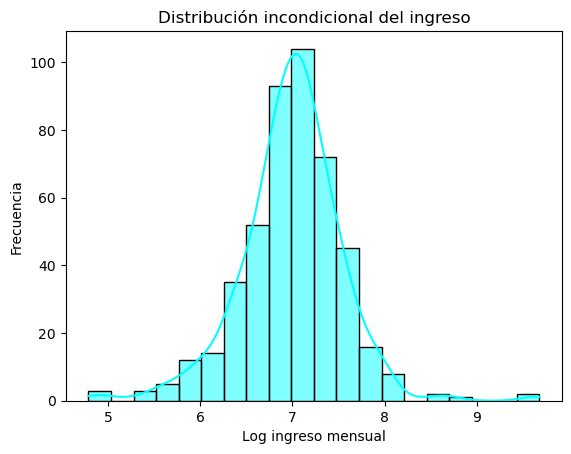

In [124]:
sns.histplot(venezolanos['log_ingreso_mensual'], kde=True, color="cyan", bins=20)
plt.title("Distribución incondicional del ingreso")
plt.xlabel("Log ingreso mensual")
plt.ylabel("Frecuencia")
plt.show()

### 2.2. Horas Mensual - VI

#### 2.2.1. Gráfico sobre la relación entre horas de trabajo y logaritmo del ingreso mensual

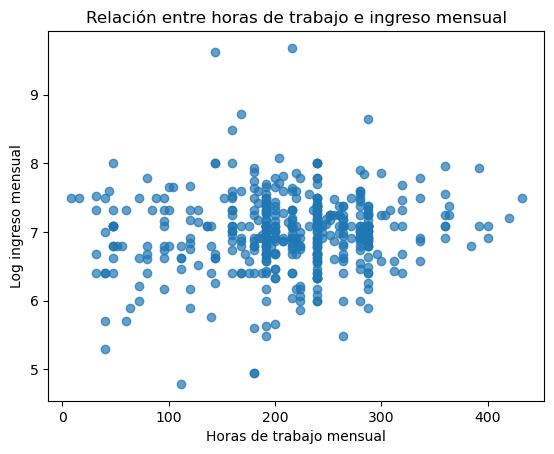

In [128]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.title('Relación entre horas de trabajo e ingreso mensual')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.show()

#### 2.2.2. Regresión lineal simple

In [137]:
venezolanos = venezolanos.dropna(subset=['horas_mensual', 'log_ingreso_mensual'])

In [139]:
X = sm.add_constant(venezolanos['horas_mensual'])  # Agregar una constante para el intercepto
y = venezolanos['log_ingreso_mensual']
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     log_ingreso_mensual   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     4.892
Date:                 Fri, 31 Jan 2025   Prob (F-statistic):             0.0275
Time:                         20:59:23   Log-Likelihood:                -378.10
No. Observations:                  467   AIC:                             760.2
Df Residuals:                      465   BIC:                             768.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8330      0.076 

#### 2.2.3. Interpretación

#### 2.2.4. Prueba White

#### 2.2.5. Línea de regresión

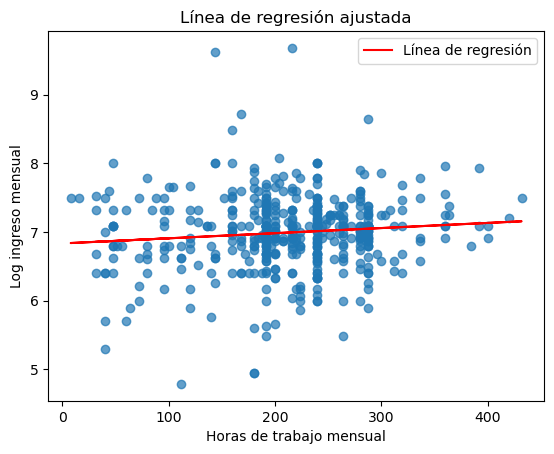

In [144]:
plt.scatter(venezolanos['horas_mensual'], venezolanos['log_ingreso_mensual'], alpha=0.7)
plt.plot(venezolanos['horas_mensual'], y_pred, color='red', label='Línea de regresión')
plt.title('Línea de regresión ajustada')
plt.xlabel('Horas de trabajo mensual')
plt.ylabel('Log ingreso mensual')
plt.legend()
plt.show()

### 2.3. Trabajó en Venezuela - VI

### 2.4. Trabajo Formal - VI

## 3. Regresión Múltiple